<a href="https://colab.research.google.com/github/katemovlyan/hw_hillel_ml/blob/main/Hillel_home_work6_7_fully_connected_nn_kate_movlian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 6 и 7. **Fully Connected Neural Nets** ⎳(⍬) → min

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

## Часть 1. Теоретическая часть 📈

В этом разделе Вам будет предложенно решить несколько теоретических задач. Некоторые задачи этого раздела, подразумевают написание кода с использование библиотек [```numpy```](https://numpy.org/doc/stable/).  Решение каждой задачи подразумевает аккуратное оформление теоретических решений. Оформление должно производиться в текстовых ячейках ноутбука с использованием синтаксиса [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформления формул. Также часть задний подразумевает написание кода🐍. Математика имплементированная в код, обычно, плохо читаема. Снабжайте свой код дополнительными коментариями, по мере необходимости🧐. Оцениваться будет: корректность решения, строгость выкладок, аргументированность, использование математических идей и подходов. Только **ответы** будут оценнены в **0** балов, даже если они правильные.



**Перед отправкой решений на проверку, добавьте в название файла свое имя и фамилию.**

Пример: ``` Hillel_home_work6.7_fully_connected_nn_philipp_kofman.ipynb```

Если вы нашли грамматические или любые другие ошибки - сообщите мне о них в приватных сообщениях 😇

**Задача 1.** На лекции мы обсуждали, что нейронные сети, а также простые нейроны способны решать задачи из [булевой алгебры](https://ru.wikipedia.org/wiki/%D0%91%D1%83%D0%BB%D0%B5%D0%B2%D0%B0_%D0%B0%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0)и не только.
Постройте руками нейронные сети которые решают следующие задачи.


1.   $ x \wedge y $
2.   $ x \wedge y \wedge z$
3.   $ x \lor y \lor z$
4.   $ (x \lor y) \wedge (x \wedge y)$


**Обратите внимание**, что в этой задаче не нужно пользоваться градиентным спуском для оптимизации. Для решения пользуйтесь алгебраическими и физическими свойствами нейронов. В качестве функции активации используйте [ступеньку](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0).

Решение каждого примера оценивается в [1 бал].

**your solution**

$ x \wedge y\\
h(x, y) = g(-1 + x + y) \\
-1 + x + y > 0$

\begin{array}{ccc}
\text{$x$}&\text{$y$}&\text{$ x \wedge y$}&\text{$-1 + x + y$}\\
0&0&0&-1\\
0&1&0& 0\\
1&0&0& 0\\
1&1&1& 1\\
\end{array}

$ x \wedge y \wedge z\\
h(x, y, z) = g(-2 + x + y + z) \\
-2 + x + y + z > 0$

\begin{array}{ccc}
\text{$x$}&\text{$y$}&\text{$z$}&\text{$ x \wedge y \wedge z$}&\text{$-2 + x + y + z$}\\
0&0&0&0&-2\\
0&0&1&0&-1\\
0&1&0&0&-1\\
0&1&1&0& 0\\
1&0&0&0&-1\\
1&0&1&0& 0\\
1&1&0&0& 0\\
1&1&1&1& 1\\
\end{array}

$ x \lor y \lor z\\
h(x, y, z) = g(x + y + z) \\
x + y + z > 0$

\begin{array}{ccc}
\text{$x$}&\text{$y$}&\text{$z$}&\text{$ x \lor y \lor z$}&\text{$x + y + z$}\\
0&0&0&0&0\\
0&0&1&1&1\\
0&1&0&1&1\\
0&1&1&1&2\\
1&0&0&1&1\\
1&0&1&1&2\\
1&1&0&1&2\\
1&1&1&1&3\\
\end{array}

$ (x \lor y) \wedge (x \wedge y) =  x \wedge (x \lor y) \wedge y = ((x \lor 0) \wedge (x \lor y)) \wedge y = (x \lor (0 \wedge y)) \wedge y = x \wedge y\\
h(x, y) = g(-1 + x + y) \\
-1 + x + y > 0$

\begin{array}{ccc}
\text{$x$}&\text{$y$}&\text{$(x \lor y)$}&\text{$(x \wedge y)$}&\text{$(x \lor y) \wedge (x \wedge y)$}&\text{$-1 + x + y$}\\
0&0&0&0&0&-1\\
0&1&1&0&0&0\\
1&0&1&0&0&0\\
1&1&1&1&1&1\\
\end{array}


**Задача 2.** Постройте такой нейрон переводящий бинарную последовательность в десятичное число. Для простоты ограничьтесь длинной входной последовательности равной 5.

примеры:


1.   0,0,0,0,0 $ \rightarrow $ 0
2.   0,0,0,0,1 $ \rightarrow $ 1
3.   0,0,0,1,1 $ \rightarrow $ 3
4.   0,0,1,0,1 $ \rightarrow $ 5
5.   1,0,0,0,0 $ \rightarrow $ 16
6.   1,0,0,1,0 $ \rightarrow $ 18


Решение оценивается в [2 балла].

**your solution**

0..4 - разряды от младшего к старшему

$h(x_0, x_1, x_2, x_3, x_4): d = \sum{2^{i} \cdot g(x_i)} = g(x_0) + 2*g(x_1) + 4*g(x_2) + 8*g(x_3) + 16*g(x_4)$



**Задача 3.** Любой процесс обучения нейронной сети начинается с данных. В этой задаче Вам нужно реализовать класс [pytorch датасет-а](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html). Данные должны представлять собой несколько облаков двухмерных точек. Каждое из них принадлежит одному из двух классов. Суммарное количество  наблюдений должно быть заданно в конструкторе класса. Посмотрите на графическую визуализацию, она должна дать больше ясности.

Базовый класс должен обладать тремя методами: __init__, __getitem__, __len__.

__init__ - конструктор, для задания парметров датасета.

__getitem__ - метод обеспечивающий поэлементный доступ к элементам датасета и их меткам.

__len__ - возвращает количество семплов в датасете.

Решение оценивается в [2 балла].

In [ ]:
import typing as t
import numpy as np
import matplotlib.pyplot as plt

from torch.optim import SGD
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
class PointsDataset(Dataset):
    def __init__(self, count_of_points: int):
      self.data = []
      total_cloud_number = np.random.randint(4, 8)

      cloud_centers = np.random.uniform(low=0, high=6, size=(total_cloud_number, 2)) # Central points for each cloud
      cloud_classes = np.random.randint(0, 2, total_cloud_number)
      # print(cloud_centers)
      for _ in range(count_of_points):
        cloud_id = np.random.randint(0, total_cloud_number)
        center = cloud_centers[cloud_id]
        std = np.random.uniform(low=0, high=0.1*(10 - total_cloud_number))
        point = np.random.normal(loc=center, scale=std)
        self.data.append((point, cloud_classes[cloud_id]))
    # self.data = [([5,6], 0), ([5.1,6], 0), ([5,5.6], 0), ([5.9,6], 0), ([1.5,1.6], 1), ([0.9,0.6], 1), ([1.1,0.66], 1), ([0.59,0.86], 1), ([5.7,5.6], 0), ([0.8,0.9], 1)]

    def __getitem__(self, index: int) -> t.Tuple[np.ndarray, float]:
        return self.data[index]

    def __len__(self) -> int:
        return len(self.data)

In [ ]:
train_dataset = PointsDataset(count_of_points=6000)

data, labels = [], []
for i in range(len(train_dataset)):
  x, y = train_dataset[i]
  data.append(x)
  labels.append(y)

data = np.array(data)

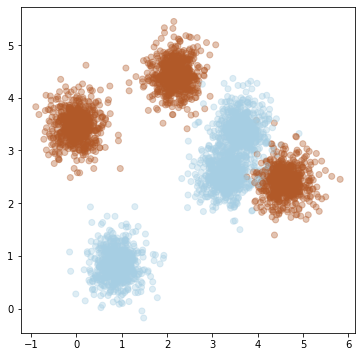

In [ ]:
plt.rcParams['figure.figsize'] = [6,6]
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired, alpha=0.36)
plt.show()

**Задача 4.** Теперь, когда у нас есть датасет самое время реализовать простую двухслойную нейронную сеть. Реализуйте базовый класс нейронной сети на pytorch-е. Нейронная сеть должна возвращать вероятность. Обратите внимание, что для удобства, стоит параметризовать количество нейронов в скрытом слое.

Решение оценивается в [2 балла].

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, count_hidden_neurons: int):
        super(SimpleNet, self).__init__()
        # определите слои
        self.fc1 = nn.Linear(2, count_hidden_neurons)
        self.bt = nn.BatchNorm1d(count_hidden_neurons)
        self.fc2 = nn.Linear(count_hidden_neurons, 1)

    def forward(self, x):
        # определите как текут данные
        x = self.fc1(x)
        x = self.bt(x)
        x = torch.sigmoid(self.fc2(x))
        return x
small_net = SimpleNet(count_hidden_neurons=3)
print(small_net)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (bt): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)


**Задача 5.** Натренируйте сеть! Воспользуйтесь материалами и примерами из лекций. Это задание предлагается выполнить самостоятельно. В интернете можно найти множество реализаций процесса тренировки нейронных сетей - посмотрите на них и продумайте свой собственный пайплайн.

Воспользуйтесь оптимизатором [SGD](https://pytorch.org/docs/stable/optim.html). Все параметры подберите самостоятельно.
После каждой эпохи оптимизации стройте [P-R кривые](https://dyakonov.org/2019/08/29/%D0%BA%D1%80%D0%B8%D0%B2%D1%8B%D0%B5-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/). Как они меняются?

Также считайте значения лосс функции на тренировочных и тестовых данных после каждой эпохи. Постройте график зависимости лосс-функций(тренировочной и тестовой) от номера эпохи.

Решение оценивается в [3 балла].

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("Cuda Device Available")
  print("Name of the Cuda Device: ", torch.cuda.get_device_name())
  print("GPU Computational Capablity: ", torch.cuda.get_device_capability())

In [ ]:
train_dataset = PointsDataset(count_of_points=6*800)
test_dataset = PointsDataset(count_of_points=6*200)
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=False, num_workers=1)

optimizer = SGD(params=small_net.parameters(), lr=0.01, momentum=0.6)
losses, train_losses, test_losses = [], [], []
optimizer.zero_grad()
count_epochs = 12
criterion = nn.MSELoss()

def train(model, x, y, optimizer, criterion):
    model.zero_grad()
    output = model(x)
    y = y.view(-1, 1) # new_shape = (len(y), 1)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    return loss, output

for epoch in range(count_epochs):
  # print('EPOCH', epoch)
  precision, recall = [], []

  for data, label in train_dataloader:
    loss, predictions = train(small_net, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))
    # p, r, th = precision_recall_curve(label.detach().numpy(), predictions.detach().numpy())
    # fpr, tpr, _ = metrics.roc_curve(label.detach().numpy(), predictions.detach().numpy(), pos_label=1)
    # precision.extend(fpr)
    # recall.extend(tpr)

  # print('Train loss: ', np.mean(losses))
  train_losses.append(np.mean(losses))

  for data, label in test_dataloader:
    loss, predictions = train(small_net, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))

    # fpr, tpr, _ = metrics.roc_curve(label.detach().numpy(), predictions.detach().numpy(), pos_label=1)
    # precision.extend(fpr)
    # recall.extend(tpr)

  # print(precision)
  # plt.plot(recall, precision)
  # plt.show()
  # print('Test loss: ', np.mean(losses))
  test_losses.append(np.mean(losses))


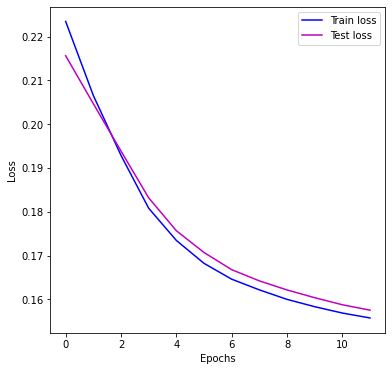

In [ ]:
plt.plot(range(len(train_losses)), train_losses, c='b', label="Train loss")
plt.plot(range(len(test_losses)), test_losses, c='m', label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

**Задача 6.** Как меняется качество, в зависимости от количества нейронов в скрытом слое? Постройте серию экспериментов наглядно демонстрирующих зависимость качества от количества нейронов.

Возьмите сеть из 1000 нейронов в скрытом слое и очень долго учите её. В какой-то момент сеть должна начать "запоминать" тренировочный датасет. На графике зависимости лосс функций, от количества эпох, вы должны увидеть ["яму"](https://habrastorage.org/webt/pm/yx/bo/pmyxbozksroikk1sbh1wxonxcvw.png).

Решение оценивается в [3 балла].

ValueError: ignored

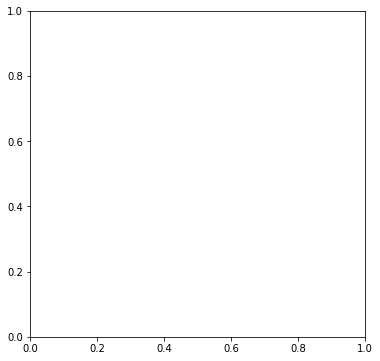

In [ ]:
counts = range(2, 4)
num_neurons_to_test_acc, num_neurons_to_train_acc = [], []

for i in counts:
  variable_net = SimpleNet(count_hidden_neurons=i)

  train_dataset = PointsDataset(count_of_points=6*800)
  test_dataset = PointsDataset(count_of_points=6*200)
  train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=1)
  test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=False, num_workers=1)

  optimizer = SGD(params=variable_net.parameters(), lr=0.01, momentum=0.6)
  losses, train_losses, test_losses = [], [], []
  optimizer.zero_grad()
  count_epochs = 12
  criterion = nn.MSELoss()
  correct_train = 0
  correct_test = 0

  def train(model, x, y, optimizer, criterion):
      model.zero_grad()
      output = model(x)
      y = y.view(-1, 1) # new_shape = (len(y), 1)
      loss = criterion(output, y)
      loss.backward()
      optimizer.step()
      return loss, output

  for epoch in range(count_epochs):
    precision, recall = [], []

    for data, label in train_dataloader:
      loss, predictions = train(variable_net, data.float(), label.float(), optimizer, criterion)

      if epoch == count_epochs - 1:
        correct_train += (predictions == label).int()
      losses.append(float(loss.detach()))
    train_losses.append(np.mean(losses))

    for data, label in test_dataloader:
      loss, predictions = train(variable_net, data.float(), label.float(), optimizer, criterion)
      if epoch == count_epochs - 1:
        correct_test += (predictions == label).int()
      losses.append(float(loss.detach()))
    test_losses.append(np.mean(losses))

    if epoch == count_epochs - 1:
      num_neurons_to_train_acc.append(correct_train/(6*800))
      num_neurons_to_test_acc.append(correct_test/(6*200))

plt.plot(counts, num_neurons_to_train_acc, c='b', label="Train acc")
plt.plot(counts, num_neurons_to_test_acc, c='m', label="Test acc")
plt.xlabel("# of neurons")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

SimpleNet(
  (fc1): Linear(in_features=2, out_features=1000, bias=True)
  (bt): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
)


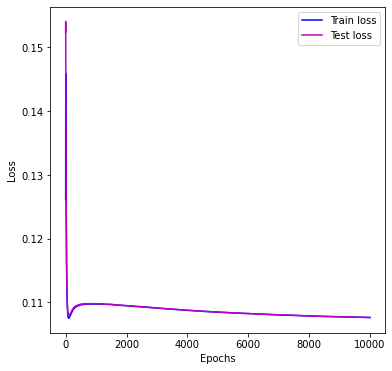

In [ ]:
# your code

net = SimpleNet(count_hidden_neurons=1000)
print(net)

train_dataset = PointsDataset(count_of_points=6*800)
test_dataset = PointsDataset(count_of_points=6*200)
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=False, num_workers=1)

optimizer = SGD(params=net.parameters(), lr=0.001)
losses, train_losses, test_losses = [], [], []
optimizer.zero_grad()
count_epochs = 10000
criterion = nn.MSELoss()

def train(model, x, y, optimizer, criterion):
    model.zero_grad()
    output = model(x)
    y = y.view(-1, 1) # new_shape = (len(y), 1)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    return loss, output

for epoch in range(count_epochs):
  # print('EPOCH', epoch)
  precision, recall = [], []

  for data, label in train_dataloader:
    loss, predictions = train(net, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))
  # print('Train loss: ', np.mean(losses))
  train_losses.append(np.mean(losses))

  for data, label in test_dataloader:
    loss, predictions = train(net, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))
  # print('Test loss: ', np.mean(losses))
  test_losses.append(np.mean(losses))

plt.plot(range(len(train_losses)), train_losses, c='b', label="Train loss")
plt.plot(range(len(test_losses)), test_losses, c='m', label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

SimpleNet(
  (fc1): Linear(in_features=2, out_features=1000, bias=True)
  (bt): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1000, out_features=1, bias=True)
)


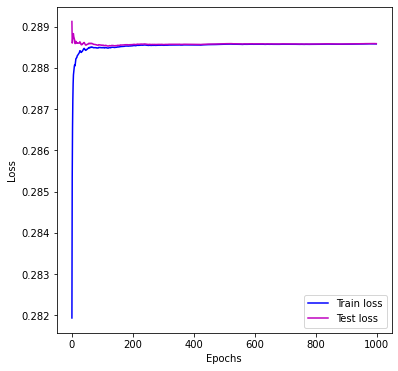

In [ ]:
# your code

net_1k = SimpleNet(count_hidden_neurons=1000)
print(net_1k)

train_dataset = PointsDataset(count_of_points=6*800)
test_dataset = PointsDataset(count_of_points=6*200)
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=12, shuffle=False, num_workers=1)

optimizer = SGD(params=net.parameters(), lr=0.001)
losses, train_losses, test_losses = [], [], []
optimizer.zero_grad()
count_epochs = 1000
criterion = nn.MSELoss()

def train(model, x, y, optimizer, criterion):
    model.zero_grad()
    output = model(x)
    y = y.view(-1, 1) # new_shape = (len(y), 1)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    return loss, output

for epoch in range(count_epochs):
  # print('EPOCH', epoch)
  precision, recall = [], []

  for data, label in train_dataloader:
    loss, predictions = train(net_1k, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))
  # print('Train loss: ', np.mean(losses))
  train_losses.append(np.mean(losses))

  for data, label in test_dataloader:
    loss, predictions = train(net_1k, data.float(), label.float(), optimizer, criterion)
    losses.append(float(loss.detach()))
  # print('Test loss: ', np.mean(losses))
  test_losses.append(np.mean(losses))

plt.plot(range(len(train_losses)), train_losses, c='b', label="Train loss")
plt.plot(range(len(test_losses)), test_losses, c='m', label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

**Задача 7.** Какие из функций активаций работают лучше всего? Для ответа на этот вопрос, постройте несколько экспериментов с разными функциями активаций(зафиксируйте все возможные гиперпараметры, кроме функций нелинейности). Возможно некоторые сети будут давать немного худший результат, но при прочих равных, намного быстрее к нему сходиться?  

Решение оценивается в [2 балла].

In [ ]:
# your code

**Задача 8.**  Шутки в сторону! Сейчас Вы попробуете написать свою нейронную сеть для распознания рукописных цифр. Датасет с которым вы будете работать называется [MNIST](https://pytorch.org/cppdocs/api/classtorch_1_1data_1_1datasets_1_1_m_n_i_s_t.html).

Реализуйте свой процесс тренировки и валидации ориентируясь на эту [статью](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627). Обратите внимание на то, как объявляется нейронная сеть. Рекомендую воспользоваться способом аналогичным задаче 4, с созданием класса нейронной сети. Такой подход является более предпочтительным.  

Рукописные цифры - достаточно хорошо распознаются, однако попробуйте добиться точности выше 98.5% - accuracy!

Попробуйте самостоятельно написать от руки несколько цифр (на пример в paint) и подсунуть их в модель. Какие вероятности она выдает? Попробуйте обмануть полученую модель подавая ей все более "хитрые" рукописные цифры, но такие, что человек их все еще распознает.

Какие вероятности будет давать модель если начать подавать в нее не рукописные цифры, а рукописные кириллические буквы?

Решение оценивается в [6 баллов].

In [ ]:
# your code